# California Housing Price Prediction Project

In this project, we develop an end-to-end machine learning pipeline to predict median house values in California districts.  
We perform exploratory data analysis, feature engineering, build two models (Linear Regression and Random Forest), and evaluate them using RMSE and cross-validation.

# Data Loading and Overview

We load the California Housing dataset, check basic structure, missing values, and data types.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

# Set some basic plotting styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Convert to DataFrame
data = housing.frame

# Show the first few rows
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# Dataset shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Check data types
print("\nData types:")
print(data.dtypes)

Dataset has 20640 rows and 9 columns.

Missing values per column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Data types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


# Exploratory Data Analysis (EDA)

We explore feature distributions, feature correlations, and relationships between important features and the target variable.

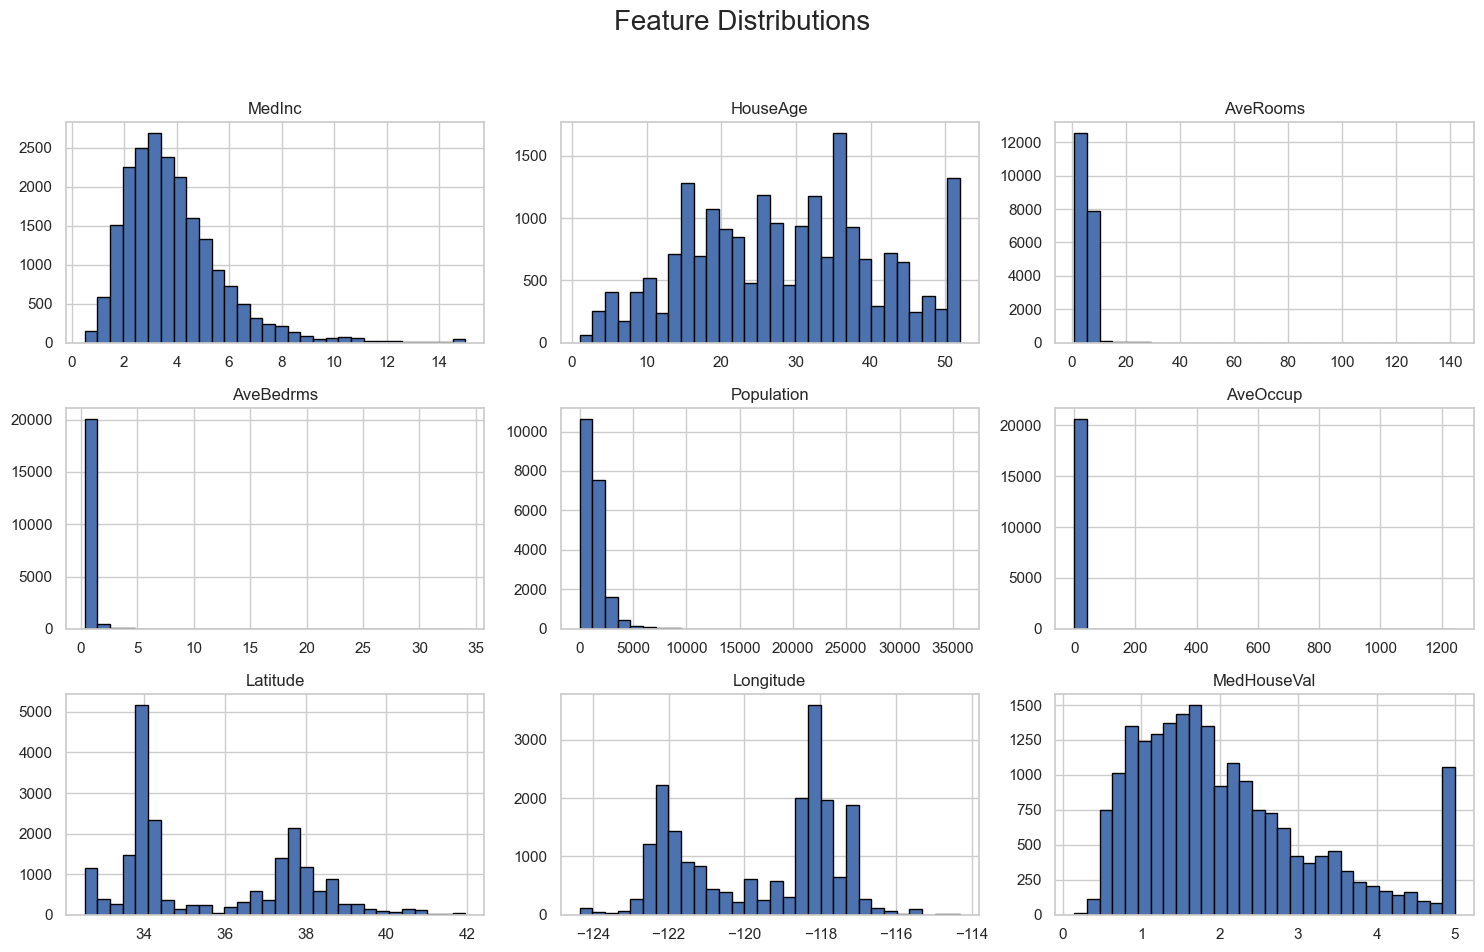

In [3]:
# Plot distributions of all features
data.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

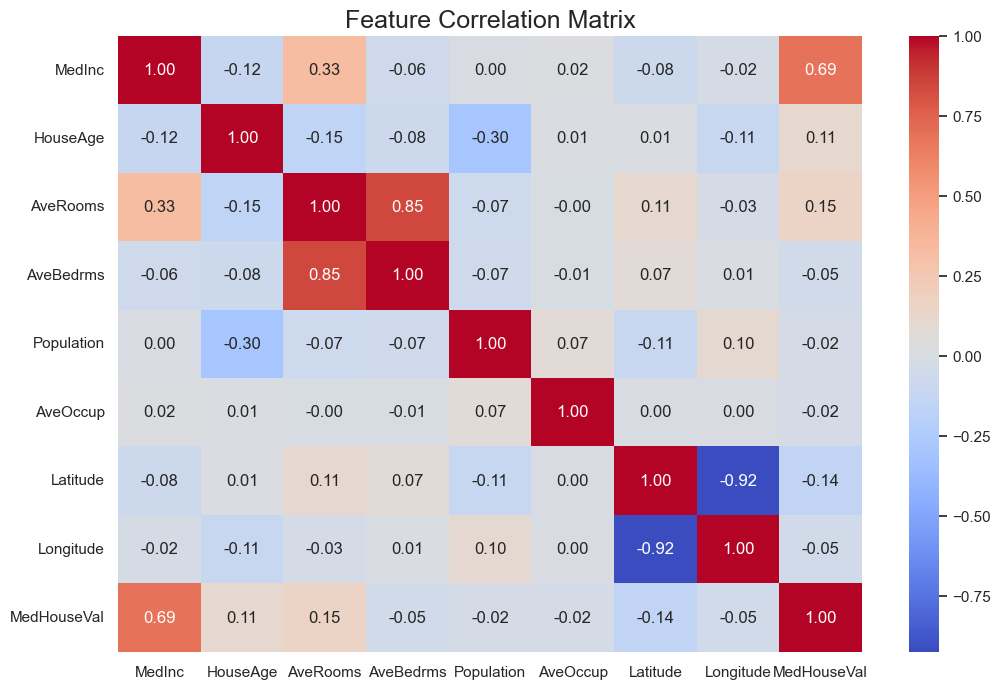

In [4]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix', fontsize=18)
plt.show()

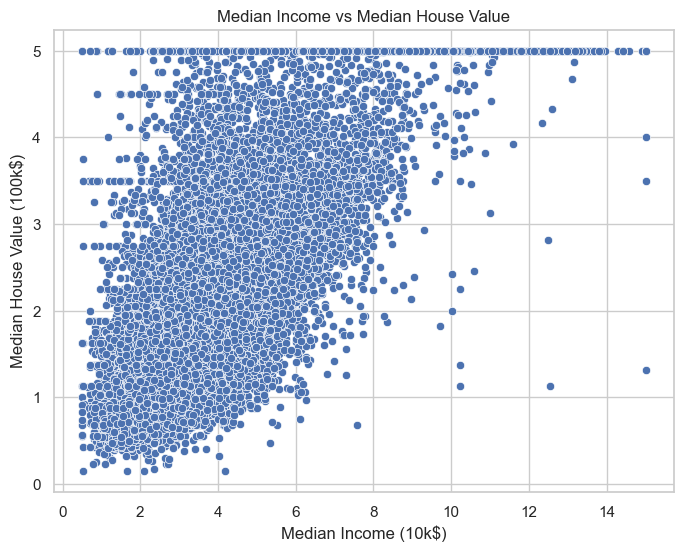

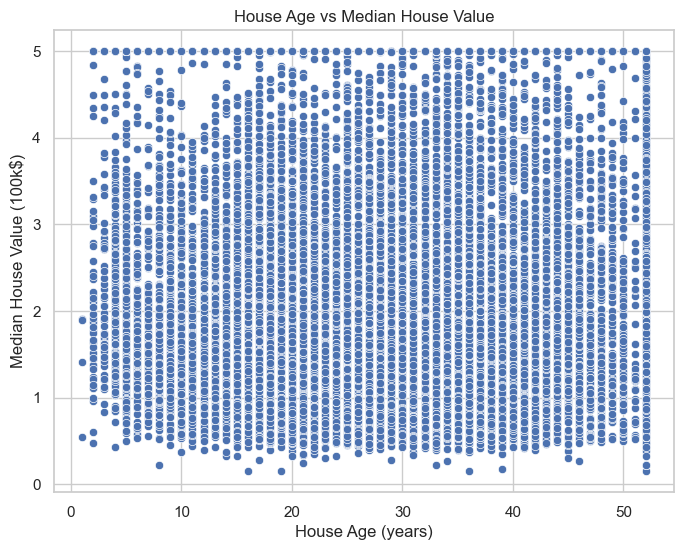

In [5]:
# Median Income vs Median House Value
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['MedInc'], y=data['MedHouseVal'])
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income (10k$)')
plt.ylabel('Median House Value (100k$)')
plt.show()

# House Age vs Median House Value
plt.figure(figsize=(8,6))
sns.scatterplot(x=data['HouseAge'], y=data['MedHouseVal'])
plt.title('House Age vs Median House Value')
plt.xlabel('House Age (years)')
plt.ylabel('Median House Value (100k$)')
plt.show()

# Feature Engineering

We check skewness of features and apply log transformations to reduce skewness and improve model performance.

In [6]:
# Check skewness of features
skewness = data.drop('MedHouseVal', axis=1).skew().sort_values(ascending=False)

print("Skewness of features:")
print(skewness)

Skewness of features:
AveOccup      97.639561
AveBedrms     31.316956
AveRooms      20.697869
Population     4.935858
MedInc         1.646657
Latitude       0.465953
HouseAge       0.060331
Longitude     -0.297801
dtype: float64


In [7]:
# List of skewed features to log-transform
skewed_features = ['AveOccup', 'AveBedrms', 'AveRooms', 'Population', 'MedInc']

# Apply log1p (log(1+x)) transformation
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

print(f"Applied log transformation to {', '.join(skewed_features)}.")

Applied log transformation to AveOccup, AveBedrms, AveRooms, Population, MedInc.


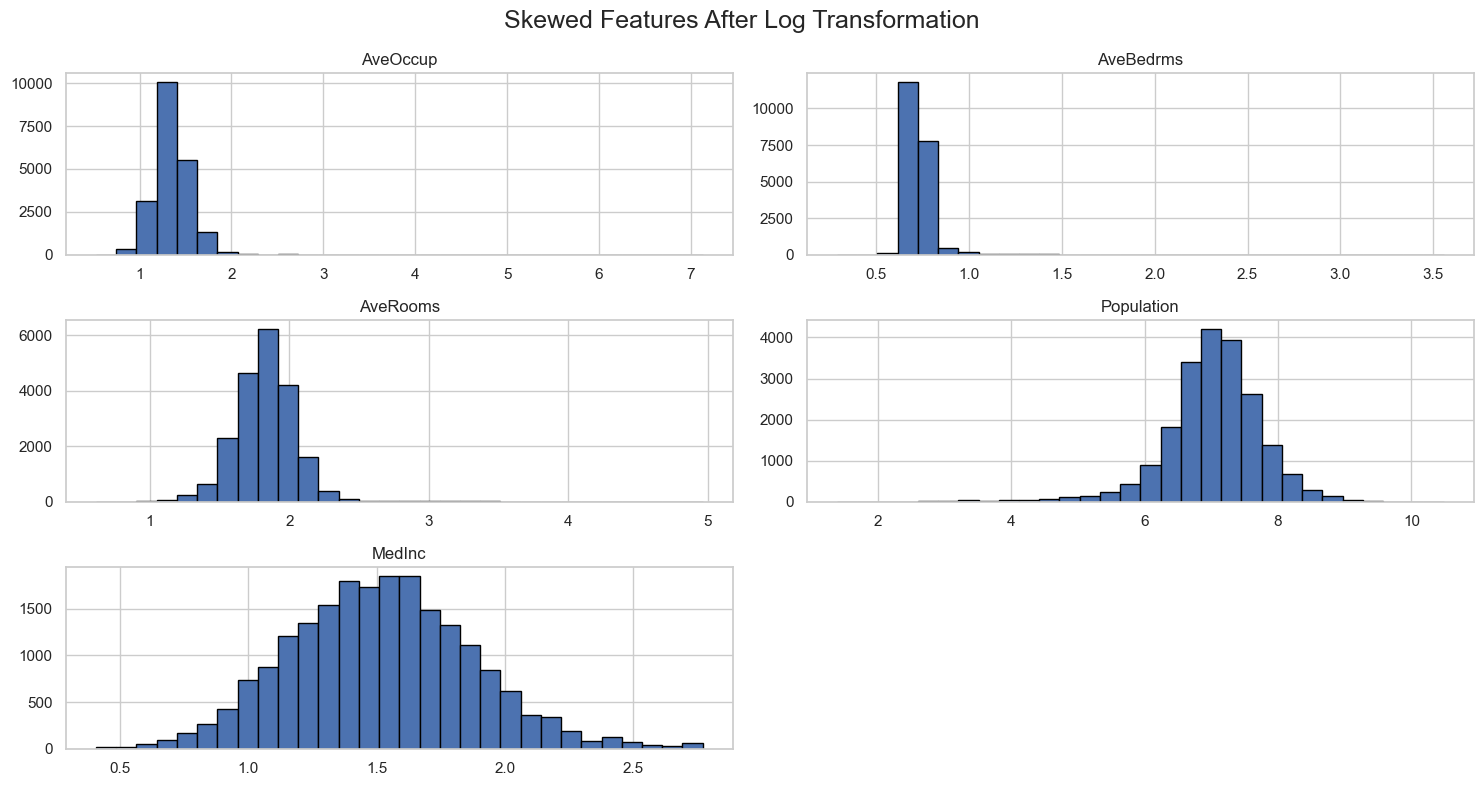

In [8]:
# Check distributions after log transform
data[skewed_features].hist(bins=30, figsize=(15, 8), edgecolor='black')
plt.suptitle('Skewed Features After Log Transformation', fontsize=18)
plt.tight_layout()
plt.show()

# Model Building and Evaluation

We train two models: Linear Regression and Random Forest Regressor.  
We compare their performance using RMSE on a held-out test set.

In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 16512, Testing samples: 4128


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
lr_preds = lr_model.predict(X_test)

# Evaluate
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"Linear Regression RMSE: {lr_rmse:.4f}")

Linear Regression RMSE: 0.7136


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"Random Forest RMSE: {rf_rmse:.4f}")

Random Forest RMSE: 0.5051


In [12]:
# Compare RMSEs
print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Random Forest RMSE: {rf_rmse:.4f}")

if lr_rmse > rf_rmse:
    print("Random Forest performs better.")
else:
    print("Linear Regression performs better.")

Linear Regression RMSE: 0.7136
Random Forest RMSE: 0.5051
Random Forest performs better.


# Cross-Validation

We perform 5-fold cross-validation to validate our models more reliably and compare average RMSE scores.

In [13]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Linear Regression
lr_cv_scores = cross_val_score(
    lr_model, X, y, 
    scoring='neg_root_mean_squared_error', 
    cv=5
)

# Convert negative scores to positive
lr_cv_rmse = -lr_cv_scores

print(f"Linear Regression Cross-Validation RMSE Scores: {lr_cv_rmse}")
print(f"Average Linear Regression CV RMSE: {lr_cv_rmse.mean():.4f}")

Linear Regression Cross-Validation RMSE Scores: [0.7016069  0.75019305 0.75626916 0.72585658 0.70848878]
Average Linear Regression CV RMSE: 0.7285


In [14]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(
    rf_model, X, y, 
    scoring='neg_root_mean_squared_error', 
    cv=5
)

# Convert negative scores to positive
rf_cv_rmse = -rf_cv_scores

print(f"Random Forest Cross-Validation RMSE Scores: {rf_cv_rmse}")
print(f"Average Random Forest CV RMSE: {rf_cv_rmse.mean():.4f}")

Random Forest Cross-Validation RMSE Scores: [0.72058044 0.58781762 0.60873852 0.65460067 0.68041331]
Average Random Forest CV RMSE: 0.6504


# Saving the Best Model

We save the Random Forest model, which achieved the best performance on the California Housing dataset.

In [15]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'california_housing_best_model.pkl')

print("Best model saved as 'california_housing_best_model.pkl'.")

Best model saved as 'california_housing_best_model.pkl'.


# Conclusion

In this project, Random Forest Regressor outperformed Linear Regression in predicting California house prices, achieving a lower RMSE both on the test set and during cross-validation.

Key learnings:
- Feature engineering, especially addressing skewness, helped improve model stability.
- Random Forest's ability to model non-linear relationships led to superior performance compared to Linear Regression.
- Cross-validation provided more reliable evaluation than a single train-test split.

In the future, model performance could be further improved through hyperparameter tuning or more advanced feature engineering.